In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading and investigating the data

In [3]:
data = pd.read_csv('bankdata.csv')

In [4]:
data.shape

(74364, 9)

In [5]:
data.dtypes

type             object
operation        object
amount_total    float64
balance         float64
k_symbol         object
amount_left       int64
duration          int64
payments        float64
status           object
dtype: object

In [6]:
data.head()

,type,operation,amount_total,balance,k_symbol,amount_left,duration,payments,status
0,PRIJEM,prevod,44749.0,45549.0,unknown,79608,24,3317.0,A
1,PRIJEM,vklad,1000.0,1000.0,unknown,52788,12,4399.0,A
2,PRIJEM,vklad,1100.0,1100.0,unknown,21924,36,609.0,A
3,PRIJEM,vklad,700.0,700.0,unknown,23052,12,1921.0,A
4,PRIJEM,vklad,900.0,900.0,unknown,41904,12,3492.0,A


In [7]:
data["status"].value_counts()

A    64599
B     9765
Name: status, dtype: int64

In [8]:
# What would be interesting questions to model out of the data with supervised algorithm?
#-How likely are you to default?So to predict the status for a customer.
# So we would like to predict if a new customer has status A or B based on the variables we have!

#Every row is one account

### Investigating the numerical variables

In [9]:
data.describe()

# Note: when mean and median are far away: skewed data

# variance/std differ a lot between values. When alg is sensitive for that, you have to be careful. 
# Decision trees are robust to that

,amount_total,balance,amount_left,duration,payments
count,74364.000000,74364.000000,74364.000000,74364.000000,74364.000000
mean,7832.649125,46022.153061,102745.132645,23.942230,4356.580832
std,11729.040391,25439.948570,74749.275498,12.155783,2205.840892
min,0.000000,-14137.200000,4980.000000,12.000000,319.000000
25%,144.300000,27675.125000,46320.000000,12.000000,2569.000000
50%,3000.000000,40965.150000,86184.000000,24.000000,4051.000000
75%,9868.500000,60098.550000,140400.000000,36.000000,6315.000000
max,87300.000000,193910.000000,464520.000000,60.000000,9736.000000


#### Investigating variable duration

In [10]:
data['duration'].value_counts()

# month im comparison to moneatry values.
# But it is also not a continous quantity, so we will convert it in categorical variable

12    28761
24    25155
36    14110
48     4721
60     1617
Name: duration, dtype: int64

In [11]:
# we will convert this to a categorical
data['duration'] = data['duration'].apply(str)

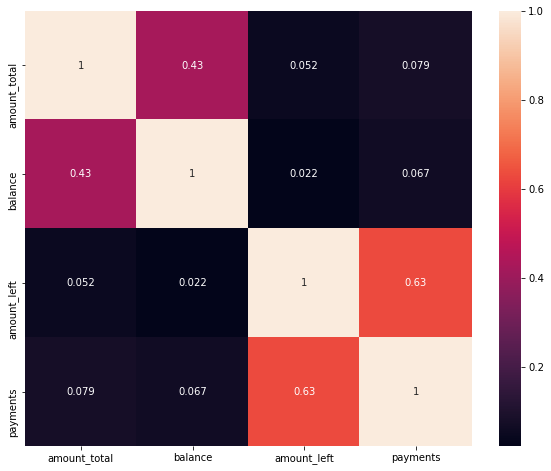

In [12]:
# Checking for multicollinearity
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

#### payments and amount_left have a rather high correlation, so we will include only one of them in the model

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


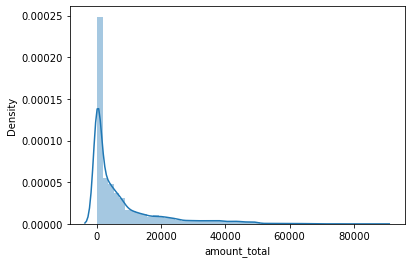

In [14]:
sns.distplot(data['amount_total'])
plt.show()

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


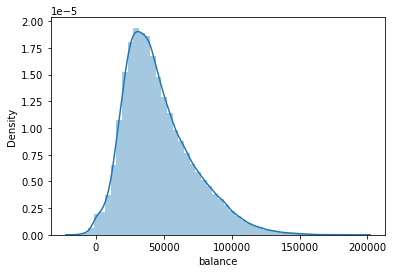

In [15]:
sns.distplot(data['balance'])
plt.show()

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


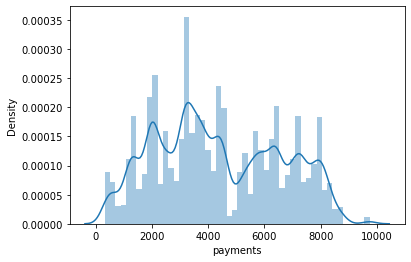

In [16]:
sns.distplot(data['payments'])
plt.show()

### Preprocessing the numerical variables

In [17]:
# we are interested in prediction, not in interpreating the coefficients; therefore we can easily standardize the variables

from sklearn.preprocessing import StandardScaler
data_num = data.select_dtypes(include = np.number).drop(columns = 'amount_left')
# selecting just numerical variables and dropping amount_left from it as we decided not to use it any further
print(data_num.head())
# Standardizing data
transformer = StandardScaler().fit(data_num)
data_num_standardized = transformer.transform(data_num)
x = pd.DataFrame(data_num_standardized, columns = data_num.columns)
print(x.head())

   amount_total  balance  payments
0       44749.0  45549.0    3317.0
1        1000.0   1000.0    4399.0
2        1100.0   1100.0     609.0
3         700.0    700.0    1921.0
4         900.0    900.0    3492.0
   amount_total   balance  payments
0      3.147453 -0.018599 -0.471289
1     -0.582545 -1.769754  0.019231
2     -0.574019 -1.765823 -1.698947
3     -0.608123 -1.781547 -1.104158
4     -0.591071 -1.773685 -0.391953


C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


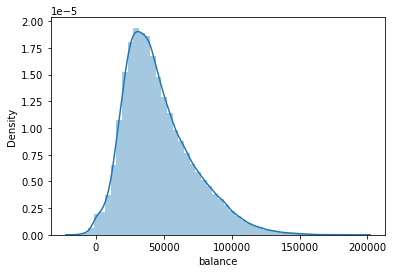

In [18]:
sns.distplot(data['balance'])
plt.show()

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


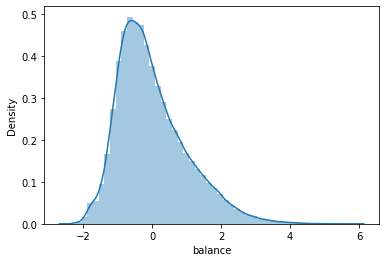

In [19]:
sns.distplot(x['balance'])
plt.show()

In [ ]:
# distributional shape basically stays the same. Just mean and variance is standardized. 
# Not absolutely necessary for desicion trees, but for others and it does not hurt desicion trees

### Getting dummies for the categorical variables

In [20]:
from sklearn.preprocessing import OneHotEncoder
cat = data.select_dtypes(include = np.object).drop(columns = 'status')
# dropping status as this is dependent variable
enc = OneHotEncoder()
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
categorical.head()

,x0_PRIJEM,x0_VYBER,x0_VYDAJ,x1_prevod,x1_unknown,x1_vklad,x1_vyber,x2_pojistne,x2_sankc. urok,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_12,x3_24,x3_36,x3_48,x3_60
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
categorical.sum(axis = 1)
# checking for correctness, 4 as we have 4 categorical values

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
74359    4.0
74360    4.0
74361    4.0
74362    4.0
74363    4.0
Length: 74364, dtype: float64

In [24]:
y = data['status']
X = pd.concat((x, categorical), axis=1)
X.head()

,amount_total,balance,payments,x0_PRIJEM,x0_VYBER,x0_VYDAJ,x1_prevod,x1_unknown,x1_vklad,x1_vyber,...,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_12,x3_24,x3_36,x3_48,x3_60
0,3.147453,-0.018599,-0.471289,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.582545,-1.769754,0.019231,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.574019,-1.765823,-1.698947,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.608123,-1.781547,-1.104158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.591071,-1.773685,-0.391953,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Splitting into train and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

#random_state: to make sure same rows are selected when I run it a second time as far as I add any random number to it
# the number is so to say a name

# random selecting for time series:
#data.loc[] to choose the first each rows

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression(max_iter = 500).fit(X_train, y_train)

In [29]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

#score tells us accuracy.It means we predict 88% of our observations in test set correctly.

0.8806226047199623

In [30]:
print(y_test.value_counts())

A    25839
B     3907
Name: status, dtype: int64


In [31]:
pd.Series(predictions).value_counts()

A    29118
B      628
dtype: int64

In [ ]:
#What happened in terms of the classes?
#We are bad at predicting B; bad at minority class - so we did systematic mistakes.

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [39]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

# good at decision trees is that we can deal with non-lineary, which log regression could not handle

0.9948228333221274

In [40]:
pd.Series(predictions).value_counts()

A    25811
B     3935
dtype: int64

In [43]:
decisiontree.feature_importances_

#the higher the value, the more important the feature; ordered in same way like our features
# most important features for target variable

array([1.35222011e-02, 1.24169703e-01, 6.53996843e-01, 1.40176197e-03,
       5.94555031e-04, 5.44031938e-04, 2.35811474e-03, 1.66831849e-04,
       1.42321120e-03, 4.40350744e-04, 4.30298091e-04, 0.00000000e+00,
       5.19590488e-04, 0.00000000e+00, 4.07751028e-04, 1.24325541e-03,
       2.78384236e-04, 7.90961013e-02, 7.81463224e-02, 1.37810668e-02,
       9.69774718e-03, 1.77818787e-02])

In [36]:
print(dict(zip(X.columns, decisiontree.feature_importances_)))



{'amount_total': 0.013373801832274206, 'balance': 0.12438125567628817, 'payments': 0.6541358013406968, 'x0_PRIJEM': 0.0012449196027567507, 'x0_VYBER': 0.0005848557293973857, 'x0_VYDAJ': 0.0004873967635009907, 'x1_prevod': 0.0021886278685564627, 'x1_unknown': 1.8224394948681077e-05, 'x1_vklad': 0.0020181840479904733, 'x1_vyber': 0.000637452737606041, 'x2_pojistne': 0.0004302980907775659, 'x2_sankc. urok': 0.0, 'x2_sipo': 0.000519590488138483, 'x2_sluzby': 0.00010480347703821307, 'x2_unknown': 0.0006861352637345512, 'x2_urok': 0.0007510384979778043, 'x2_uver': 0.0, 'x3_12': 0.08102432152849688, 'x3_24': 0.07615260000379691, 'x3_36': 0.013781066784655167, 'x3_48': 0.009697747177566458, 'x3_60': 0.01778187869380181}


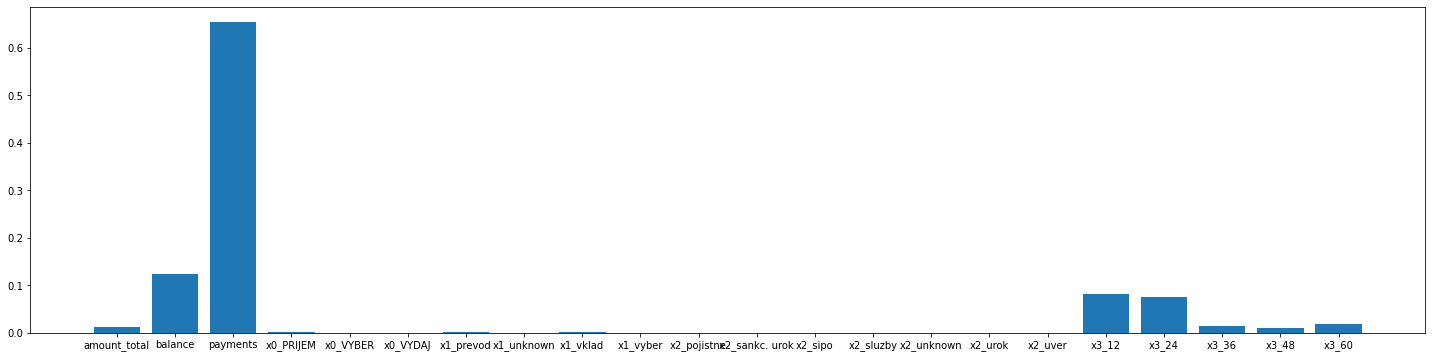

In [37]:
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(height = decisiontree.feature_importances_, x = X.columns)
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
predictions = svm.predict(X_test)
print(svm.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier().fit(X_train, y_train)
predictions = nearest_neighbors.predict(X_test)
print(nearest_neighbors.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

### Supervised Learning: Regression

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# SVR
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor